In [17]:
import os
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
import time
import random
#from data_utils.py import load_CIFAR10

params = {}
params['batch_size'] = 100
params['num_epochs'] = 100
params['learning_rate'] = 1e-2
params['activation'] = 'relu'
params['optimizer'] = 'sgd'
params['layers'] = [4096, 4096]
params['output_dim'] = 10
params['input_dim'] = 28*28

# Building the network

In [13]:
def build_network(activation, layer_dims, input_dims, num_classes):
    """ 
    layer_dims: excluding input and output dimensions. 
    """
    model = Sequential()
    
    model.add(Dense(layer_dims[0],input_dim=input_dims))   
    for i in range(1,len(layer_dims)):
        model.add(Activation(activation))
        model.add(Dense(layer_dims[i]))
    
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
    return model

# Loading MNIST dataset

In [14]:
# the data, split between train and test sets
def loadData():
    
    num_classes = 10

    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
    num_rows = X_train.shape[1]
    num_cols = X_train.shape[2]
    #num_channels = X_train.shape[3]
    input_dims = num_rows*num_cols 
    print(X_train.shape)
    
    X_train = X_train.reshape(X_train.shape[0], input_dims)
    X_test = X_test.reshape(X_test.shape[0], input_dims)
    
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
                          
    return X_train, Y_train, X_test, Y_test
    

# Run the network

In [15]:
X_train, Y_train, X_test, Y_test = loadData()
data_mean = np.mean(X_train)
data_std_dev = np.std(X_train)

def Add_noise(p, x):
        data = x
        num = int(p*len(x))
        ix = random.sample(range(0, len(x)), num)
        for i in ix:
            randX = data_std_dev*np.random.randn(1, x.shape[1]) + data_mean
            data[i] = randX
        return data
        


(60000, 28, 28)


In [19]:
acc = []

Train on 60000 samples, validate on 1 samples
Epoch 1/100
 - 1s - loss: 1.9806 - acc: 0.2873 - val_loss: 0.7888 - val_acc: 1.0000
Epoch 2/100
 - 1s - loss: 1.1973 - acc: 0.6162 - val_loss: 0.0471 - val_acc: 1.0000
Epoch 3/100
 - 1s - loss: 0.9125 - acc: 0.7193 - val_loss: 0.0483 - val_acc: 1.0000
Epoch 4/100
 - 1s - loss: 0.7654 - acc: 0.7678 - val_loss: 0.0565 - val_acc: 1.0000
Epoch 5/100
 - 1s - loss: 0.6876 - acc: 0.7925 - val_loss: 0.0441 - val_acc: 1.0000
Epoch 6/100
 - 1s - loss: 0.6421 - acc: 0.8092 - val_loss: 0.0410 - val_acc: 1.0000
Epoch 7/100
 - 1s - loss: 0.6113 - acc: 0.8197 - val_loss: 0.0380 - val_acc: 1.0000
Epoch 8/100
 - 1s - loss: 0.5877 - acc: 0.8278 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 9/100
 - 1s - loss: 0.5696 - acc: 0.8338 - val_loss: 0.0262 - val_acc: 1.0000
Epoch 10/100
 - 1s - loss: 0.5551 - acc: 0.8387 - val_loss: 0.0204 - val_acc: 1.0000
Epoch 11/100
 - 1s - loss: 0.5429 - acc: 0.8421 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 12/100
 - 1s - loss: 0

Epoch 97/100
 - 1s - loss: 0.4115 - acc: 0.8828 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 98/100
 - 1s - loss: 0.4111 - acc: 0.8826 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 99/100
 - 1s - loss: 0.4112 - acc: 0.8828 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 100/100
 - 1s - loss: 0.4107 - acc: 0.8819 - val_loss: 0.0104 - val_acc: 1.0000
Train on 60000 samples, validate on 1 samples
Epoch 1/100
 - 1s - loss: 1.5021 - acc: 0.5320 - val_loss: 0.4606 - val_acc: 1.0000
Epoch 2/100
 - 1s - loss: 0.5843 - acc: 0.8406 - val_loss: 0.0706 - val_acc: 1.0000
Epoch 3/100
 - 1s - loss: 0.4279 - acc: 0.8794 - val_loss: 0.0322 - val_acc: 1.0000
Epoch 4/100
 - 1s - loss: 0.3715 - acc: 0.8939 - val_loss: 0.0250 - val_acc: 1.0000
Epoch 5/100
 - 1s - loss: 0.3402 - acc: 0.9040 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 6/100
 - 1s - loss: 0.3193 - acc: 0.9090 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 7/100
 - 1s - loss: 0.3037 - acc: 0.9130 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 8/100
 - 1s - loss:

Epoch 93/100
 - 1s - loss: 0.1235 - acc: 0.9643 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 94/100
 - 1s - loss: 0.1230 - acc: 0.9647 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 95/100
 - 1s - loss: 0.1226 - acc: 0.9644 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 96/100
 - 1s - loss: 0.1221 - acc: 0.9647 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 97/100
 - 1s - loss: 0.1217 - acc: 0.9645 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 98/100
 - 1s - loss: 0.1213 - acc: 0.9649 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 99/100
 - 1s - loss: 0.1208 - acc: 0.9655 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 100/100
 - 1s - loss: 0.1200 - acc: 0.9654 - val_loss: 0.0027 - val_acc: 1.0000
Train on 60000 samples, validate on 1 samples
Epoch 1/100
 - 2s - loss: 0.9921 - acc: 0.7435 - val_loss: 0.0225 - val_acc: 1.0000
Epoch 2/100
 - 1s - loss: 0.4288 - acc: 0.8848 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 3/100
 - 1s - loss: 0.3572 - acc: 0.9006 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 4/100
 - 1s - l

Epoch 89/100
 - 1s - loss: 0.0422 - acc: 0.9888 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 90/100
 - 1s - loss: 0.0416 - acc: 0.9895 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 91/100
 - 1s - loss: 0.0410 - acc: 0.9892 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 92/100
 - 1s - loss: 0.0405 - acc: 0.9897 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 93/100
 - 1s - loss: 0.0399 - acc: 0.9898 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 94/100
 - 1s - loss: 0.0394 - acc: 0.9900 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 95/100
 - 1s - loss: 0.0388 - acc: 0.9901 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 96/100
 - 1s - loss: 0.0382 - acc: 0.9905 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 97/100
 - 1s - loss: 0.0377 - acc: 0.9906 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 98/100
 - 1s - loss: 0.0373 - acc: 0.9902 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 99/100
 - 1s - loss: 0.0367 - acc: 0.9906 - val_loss: 8.1030e-04 - val_acc: 1.0000
Epoch 100/100
 - 1s - loss: 0.0361 - acc: 0.9907 - val_loss: 

Epoch 83/100
 - 4s - loss: 0.0250 - acc: 0.9951 - val_loss: 9.7637e-05 - val_acc: 1.0000
Epoch 84/100
 - 4s - loss: 0.0245 - acc: 0.9950 - val_loss: 9.5372e-05 - val_acc: 1.0000
Epoch 85/100
 - 3s - loss: 0.0240 - acc: 0.9953 - val_loss: 1.2315e-04 - val_acc: 1.0000
Epoch 86/100
 - 3s - loss: 0.0234 - acc: 0.9956 - val_loss: 5.8712e-05 - val_acc: 1.0000
Epoch 87/100
 - 3s - loss: 0.0230 - acc: 0.9955 - val_loss: 6.6104e-05 - val_acc: 1.0000
Epoch 88/100
 - 3s - loss: 0.0227 - acc: 0.9957 - val_loss: 6.4614e-05 - val_acc: 1.0000
Epoch 89/100
 - 3s - loss: 0.0222 - acc: 0.9959 - val_loss: 1.0503e-04 - val_acc: 1.0000
Epoch 90/100
 - 3s - loss: 0.0216 - acc: 0.9962 - val_loss: 4.7327e-05 - val_acc: 1.0000
Epoch 91/100
 - 3s - loss: 0.0213 - acc: 0.9964 - val_loss: 5.9964e-05 - val_acc: 1.0000
Epoch 92/100
 - 3s - loss: 0.0209 - acc: 0.9962 - val_loss: 5.8295e-05 - val_acc: 1.0000
Epoch 93/100
 - 3s - loss: 0.0205 - acc: 0.9965 - val_loss: 6.1514e-05 - val_acc: 1.0000
Epoch 94/100
 - 3s - 

Epoch 77/100
 - 16s - loss: 0.0204 - acc: 0.9968 - val_loss: 8.4460e-04 - val_acc: 1.0000
Epoch 78/100
 - 16s - loss: 0.0200 - acc: 0.9969 - val_loss: 5.7124e-04 - val_acc: 1.0000
Epoch 79/100
 - 17s - loss: 0.0195 - acc: 0.9968 - val_loss: 6.2312e-04 - val_acc: 1.0000
Epoch 80/100
 - 15s - loss: 0.0190 - acc: 0.9971 - val_loss: 7.7349e-04 - val_acc: 1.0000
Epoch 81/100
 - 15s - loss: 0.0186 - acc: 0.9972 - val_loss: 7.4319e-04 - val_acc: 1.0000
Epoch 82/100
 - 15s - loss: 0.0182 - acc: 0.9974 - val_loss: 5.4154e-04 - val_acc: 1.0000
Epoch 83/100
 - 16s - loss: 0.0178 - acc: 0.9975 - val_loss: 5.9694e-04 - val_acc: 1.0000
Epoch 84/100
 - 15s - loss: 0.0174 - acc: 0.9975 - val_loss: 5.1732e-04 - val_acc: 1.0000
Epoch 85/100
 - 15s - loss: 0.0170 - acc: 0.9977 - val_loss: 6.4209e-04 - val_acc: 1.0000
Epoch 86/100
 - 15s - loss: 0.0166 - acc: 0.9976 - val_loss: 6.3266e-04 - val_acc: 1.0000
Epoch 87/100
 - 15s - loss: 0.0162 - acc: 0.9978 - val_loss: 5.0772e-04 - val_acc: 1.0000
Epoch 88/1

Epoch 72/100
 - 1s - loss: 0.8181 - acc: 0.7208 - val_loss: 0.0177 - val_acc: 1.0000
Epoch 73/100
 - 1s - loss: 0.8176 - acc: 0.7208 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 74/100
 - 1s - loss: 0.8174 - acc: 0.7209 - val_loss: 0.0245 - val_acc: 1.0000
Epoch 75/100
 - 1s - loss: 0.8169 - acc: 0.7206 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 76/100
 - 1s - loss: 0.8164 - acc: 0.7210 - val_loss: 0.0226 - val_acc: 1.0000
Epoch 77/100
 - 1s - loss: 0.8160 - acc: 0.7205 - val_loss: 0.0177 - val_acc: 1.0000
Epoch 78/100
 - 1s - loss: 0.8154 - acc: 0.7208 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 79/100
 - 1s - loss: 0.8150 - acc: 0.7214 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 80/100
 - 1s - loss: 0.8150 - acc: 0.7215 - val_loss: 0.0180 - val_acc: 1.0000
Epoch 81/100
 - 1s - loss: 0.8146 - acc: 0.7217 - val_loss: 0.0233 - val_acc: 1.0000
Epoch 82/100
 - 1s - loss: 0.8139 - acc: 0.7218 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 83/100
 - 1s - loss: 0.8138 - acc: 0.7208 - val_loss: 0.021

Epoch 68/100
 - 1s - loss: 0.5327 - acc: 0.8121 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 69/100
 - 1s - loss: 0.5313 - acc: 0.8125 - val_loss: 0.0075 - val_acc: 1.0000
Epoch 70/100
 - 1s - loss: 0.5301 - acc: 0.8127 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 71/100
 - 1s - loss: 0.5289 - acc: 0.8133 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 72/100
 - 1s - loss: 0.5274 - acc: 0.8141 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 73/100
 - 1s - loss: 0.5264 - acc: 0.8146 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 74/100
 - 1s - loss: 0.5250 - acc: 0.8143 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 75/100
 - 1s - loss: 0.5240 - acc: 0.8152 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 76/100
 - 1s - loss: 0.5228 - acc: 0.8151 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 77/100
 - 1s - loss: 0.5219 - acc: 0.8159 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 78/100
 - 1s - loss: 0.5205 - acc: 0.8161 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 79/100
 - 1s - loss: 0.5191 - acc: 0.8167 - val_loss: 0.006

 - 1s - loss: 0.3355 - acc: 0.8940 - val_loss: 2.7189e-04 - val_acc: 1.0000
Epoch 64/100
 - 1s - loss: 0.3300 - acc: 0.8966 - val_loss: 2.0548e-04 - val_acc: 1.0000
Epoch 65/100
 - 1s - loss: 0.3247 - acc: 0.8981 - val_loss: 2.7601e-04 - val_acc: 1.0000
Epoch 66/100
 - 1s - loss: 0.3196 - acc: 0.8994 - val_loss: 2.4614e-04 - val_acc: 1.0000
Epoch 67/100
 - 1s - loss: 0.3142 - acc: 0.9018 - val_loss: 1.5904e-04 - val_acc: 1.0000
Epoch 68/100
 - 1s - loss: 0.3093 - acc: 0.9032 - val_loss: 1.4235e-04 - val_acc: 1.0000
Epoch 69/100
 - 1s - loss: 0.3040 - acc: 0.9055 - val_loss: 1.2744e-04 - val_acc: 1.0000
Epoch 70/100
 - 1s - loss: 0.2985 - acc: 0.9075 - val_loss: 1.4115e-04 - val_acc: 1.0000
Epoch 71/100
 - 1s - loss: 0.2938 - acc: 0.9092 - val_loss: 1.4819e-04 - val_acc: 1.0000
Epoch 72/100
 - 1s - loss: 0.2887 - acc: 0.9115 - val_loss: 1.8580e-04 - val_acc: 1.0000
Epoch 73/100
 - 1s - loss: 0.2837 - acc: 0.9135 - val_loss: 9.2213e-05 - val_acc: 1.0000
Epoch 74/100
 - 2s - loss: 0.2786 

Epoch 57/100
 - 3s - loss: 0.1627 - acc: 0.9715 - val_loss: 2.4363e-04 - val_acc: 1.0000
Epoch 58/100
 - 3s - loss: 0.1544 - acc: 0.9744 - val_loss: 4.3455e-04 - val_acc: 1.0000
Epoch 59/100
 - 3s - loss: 0.1462 - acc: 0.9772 - val_loss: 5.3873e-04 - val_acc: 1.0000
Epoch 60/100
 - 3s - loss: 0.1380 - acc: 0.9796 - val_loss: 3.7999e-04 - val_acc: 1.0000
Epoch 61/100
 - 3s - loss: 0.1306 - acc: 0.9818 - val_loss: 4.2537e-04 - val_acc: 1.0000
Epoch 62/100
 - 3s - loss: 0.1232 - acc: 0.9840 - val_loss: 3.4606e-04 - val_acc: 1.0000
Epoch 63/100
 - 3s - loss: 0.1163 - acc: 0.9858 - val_loss: 1.9642e-04 - val_acc: 1.0000
Epoch 64/100
 - 3s - loss: 0.1097 - acc: 0.9875 - val_loss: 2.9199e-04 - val_acc: 1.0000
Epoch 65/100
 - 3s - loss: 0.1035 - acc: 0.9892 - val_loss: 1.0610e-04 - val_acc: 1.0000
Epoch 66/100
 - 3s - loss: 0.0976 - acc: 0.9902 - val_loss: 2.1049e-04 - val_acc: 1.0000
Epoch 67/100
 - 3s - loss: 0.0921 - acc: 0.9914 - val_loss: 1.6786e-04 - val_acc: 1.0000
Epoch 68/100
 - 3s - 

Epoch 50/100
 - 15s - loss: 0.0955 - acc: 0.9937 - val_loss: 3.2979e-04 - val_acc: 1.0000
Epoch 51/100
 - 15s - loss: 0.0882 - acc: 0.9948 - val_loss: 2.6844e-04 - val_acc: 1.0000
Epoch 52/100
 - 14s - loss: 0.0816 - acc: 0.9953 - val_loss: 1.9403e-04 - val_acc: 1.0000
Epoch 53/100
 - 15s - loss: 0.0753 - acc: 0.9961 - val_loss: 2.5240e-04 - val_acc: 1.0000
Epoch 54/100
 - 16s - loss: 0.0699 - acc: 0.9963 - val_loss: 2.3243e-04 - val_acc: 1.0000
Epoch 55/100
 - 15s - loss: 0.0649 - acc: 0.9966 - val_loss: 1.3680e-04 - val_acc: 1.0000
Epoch 56/100
 - 15s - loss: 0.0602 - acc: 0.9972 - val_loss: 1.9719e-04 - val_acc: 1.0000
Epoch 57/100
 - 15s - loss: 0.0561 - acc: 0.9972 - val_loss: 2.8197e-04 - val_acc: 1.0000
Epoch 58/100
 - 15s - loss: 0.0522 - acc: 0.9978 - val_loss: 1.3269e-04 - val_acc: 1.0000
Epoch 59/100
 - 15s - loss: 0.0488 - acc: 0.9978 - val_loss: 1.4634e-04 - val_acc: 1.0000
Epoch 60/100
 - 15s - loss: 0.0457 - acc: 0.9980 - val_loss: 1.8414e-04 - val_acc: 1.0000
Epoch 61/1

Epoch 43/100
 - 1s - loss: 1.4289 - acc: 0.4732 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 44/100
 - 1s - loss: 1.4281 - acc: 0.4730 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 45/100
 - 1s - loss: 1.4272 - acc: 0.4738 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 46/100
 - 1s - loss: 1.4269 - acc: 0.4697 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 47/100
 - 1s - loss: 1.4262 - acc: 0.4744 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 48/100
 - 1s - loss: 1.4254 - acc: 0.4727 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 49/100
 - 1s - loss: 1.4247 - acc: 0.4745 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 50/100
 - 1s - loss: 1.4239 - acc: 0.4747 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 51/100
 - 1s - loss: 1.4234 - acc: 0.4747 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 52/100
 - 1s - loss: 1.4229 - acc: 0.4751 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 53/100
 - 1s - loss: 1.4223 - acc: 0.4748 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 54/100
 - 1s - loss: 1.4218 - acc: 0.4759 - val_loss: 0.002

Epoch 39/100
 - 2s - loss: 1.2643 - acc: 0.5301 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 40/100
 - 2s - loss: 1.2620 - acc: 0.5309 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 41/100
 - 2s - loss: 1.2597 - acc: 0.5317 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 42/100
 - 2s - loss: 1.2578 - acc: 0.5322 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 43/100
 - 2s - loss: 1.2554 - acc: 0.5335 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 44/100
 - 2s - loss: 1.2533 - acc: 0.5331 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 45/100
 - 1s - loss: 1.2510 - acc: 0.5344 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 46/100
 - 2s - loss: 1.2491 - acc: 0.5341 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 47/100
 - 2s - loss: 1.2469 - acc: 0.5356 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 48/100
 - 2s - loss: 1.2449 - acc: 0.5362 - val_loss: 9.9906e-04 - val_acc: 1.0000
Epoch 49/100
 - 2s - loss: 1.2428 - acc: 0.5380 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 50/100
 - 2s - loss: 1.2407 - acc: 0.5382 - val_loss: 0

Epoch 33/100
 - 2s - loss: 1.1814 - acc: 0.5811 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 34/100
 - 2s - loss: 1.1748 - acc: 0.5835 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 35/100
 - 2s - loss: 1.1681 - acc: 0.5866 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 36/100
 - 2s - loss: 1.1613 - acc: 0.5894 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 37/100
 - 2s - loss: 1.1545 - acc: 0.5917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 38/100
 - 2s - loss: 1.1477 - acc: 0.5956 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 39/100
 - 2s - loss: 1.1409 - acc: 0.5980 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 40/100
 - 2s - loss: 1.1339 - acc: 0.6004 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 41/100
 - 2s - loss: 1.1267 - acc: 0.6034 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 42/100
 - 2s - loss: 1.1196 - acc: 0.6074 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 43/100
 - 2s - loss: 1.1124 - acc: 0.6102 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 44/100
 - 2s - loss: 1.1051 - acc: 0.6126 - val_loss: 0.001

 - 3s - loss: 1.1259 - acc: 0.6087 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 28/100
 - 3s - loss: 1.1119 - acc: 0.6157 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 29/100
 - 3s - loss: 1.0974 - acc: 0.6222 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 30/100
 - 3s - loss: 1.0823 - acc: 0.6281 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 31/100
 - 3s - loss: 1.0667 - acc: 0.6358 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 32/100
 - 3s - loss: 1.0506 - acc: 0.6428 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 33/100
 - 3s - loss: 1.0339 - acc: 0.6496 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 34/100
 - 3s - loss: 1.0164 - acc: 0.6582 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 35/100
 - 3s - loss: 0.9988 - acc: 0.6662 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 36/100
 - 3s - loss: 0.9796 - acc: 0.6731 - val_loss: 7.5011e-04 - val_acc: 1.0000
Epoch 37/100
 - 3s - loss: 0.9603 - acc: 0.6818 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 38/100
 - 3s - loss: 0.9401 - acc: 0.6915 - val_loss: 0.0012 - val_a

 - 18s - loss: 1.1110 - acc: 0.6211 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 21/100
 - 17s - loss: 1.0893 - acc: 0.6310 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 22/100
 - 17s - loss: 1.0667 - acc: 0.6424 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 23/100
 - 17s - loss: 1.0428 - acc: 0.6559 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 24/100
 - 17s - loss: 1.0173 - acc: 0.6667 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 25/100
 - 17s - loss: 0.9904 - acc: 0.6792 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 26/100
 - 16s - loss: 0.9612 - acc: 0.6923 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 27/100
 - 17s - loss: 0.9307 - acc: 0.7096 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 28/100
 - 16s - loss: 0.8981 - acc: 0.7270 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 29/100
 - 16s - loss: 0.8634 - acc: 0.7423 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 30/100
 - 17s - loss: 0.8261 - acc: 0.7622 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 31/100
 - 20s - loss: 0.7876 - acc: 0.7801 - val_loss: 9.3009

Epoch 12/100
 - 1s - loss: 2.1286 - acc: 0.1939 - val_loss: 0.6385 - val_acc: 1.0000
Epoch 13/100
 - 1s - loss: 2.1046 - acc: 0.1965 - val_loss: 0.4896 - val_acc: 1.0000
Epoch 14/100
 - 1s - loss: 2.0890 - acc: 0.1999 - val_loss: 0.4168 - val_acc: 1.0000
Epoch 15/100
 - 1s - loss: 2.0783 - acc: 0.2031 - val_loss: 0.3612 - val_acc: 1.0000
Epoch 16/100
 - 1s - loss: 2.0707 - acc: 0.2101 - val_loss: 0.3181 - val_acc: 1.0000
Epoch 17/100
 - 1s - loss: 2.0649 - acc: 0.2139 - val_loss: 0.2752 - val_acc: 1.0000
Epoch 18/100
 - 1s - loss: 2.0601 - acc: 0.2162 - val_loss: 0.2573 - val_acc: 1.0000
Epoch 19/100
 - 1s - loss: 2.0563 - acc: 0.2183 - val_loss: 0.2229 - val_acc: 1.0000
Epoch 20/100
 - 1s - loss: 2.0526 - acc: 0.2200 - val_loss: 0.2256 - val_acc: 1.0000
Epoch 21/100
 - 1s - loss: 2.0496 - acc: 0.2216 - val_loss: 0.1909 - val_acc: 1.0000
Epoch 22/100
 - 1s - loss: 2.0468 - acc: 0.2231 - val_loss: 0.1652 - val_acc: 1.0000
Epoch 23/100
 - 1s - loss: 2.0442 - acc: 0.2244 - val_loss: 0.157

Epoch 8/100
 - 1s - loss: 1.9844 - acc: 0.2506 - val_loss: 0.0765 - val_acc: 1.0000
Epoch 9/100
 - 1s - loss: 1.9749 - acc: 0.2531 - val_loss: 0.0587 - val_acc: 1.0000
Epoch 10/100
 - 1s - loss: 1.9672 - acc: 0.2564 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 11/100
 - 1s - loss: 1.9606 - acc: 0.2590 - val_loss: 0.0346 - val_acc: 1.0000
Epoch 12/100
 - 1s - loss: 1.9549 - acc: 0.2615 - val_loss: 0.0311 - val_acc: 1.0000
Epoch 13/100
 - 1s - loss: 1.9497 - acc: 0.2638 - val_loss: 0.0252 - val_acc: 1.0000
Epoch 14/100
 - 1s - loss: 1.9451 - acc: 0.2645 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 15/100
 - 1s - loss: 1.9409 - acc: 0.2676 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 16/100
 - 1s - loss: 1.9370 - acc: 0.2699 - val_loss: 0.0228 - val_acc: 1.0000
Epoch 17/100
 - 1s - loss: 1.9334 - acc: 0.2715 - val_loss: 0.0228 - val_acc: 1.0000
Epoch 18/100
 - 1s - loss: 1.9301 - acc: 0.2724 - val_loss: 0.0208 - val_acc: 1.0000
Epoch 19/100
 - 1s - loss: 1.9268 - acc: 0.2739 - val_loss: 0.0210 

Epoch 4/100
 - 1s - loss: 2.0284 - acc: 0.2481 - val_loss: 0.1154 - val_acc: 1.0000
Epoch 5/100
 - 2s - loss: 2.0010 - acc: 0.2553 - val_loss: 0.0679 - val_acc: 1.0000
Epoch 6/100
 - 2s - loss: 1.9814 - acc: 0.2597 - val_loss: 0.0427 - val_acc: 1.0000
Epoch 7/100
 - 2s - loss: 1.9668 - acc: 0.2637 - val_loss: 0.0286 - val_acc: 1.0000
Epoch 8/100
 - 2s - loss: 1.9553 - acc: 0.2673 - val_loss: 0.0204 - val_acc: 1.0000
Epoch 9/100
 - 2s - loss: 1.9460 - acc: 0.2701 - val_loss: 0.0167 - val_acc: 1.0000
Epoch 10/100
 - 2s - loss: 1.9380 - acc: 0.2734 - val_loss: 0.0116 - val_acc: 1.0000
Epoch 11/100
 - 1s - loss: 1.9312 - acc: 0.2769 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 12/100
 - 1s - loss: 1.9249 - acc: 0.2809 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 13/100
 - 2s - loss: 1.9191 - acc: 0.2841 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 14/100
 - 1s - loss: 1.9136 - acc: 0.2871 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 15/100
 - 1s - loss: 1.9083 - acc: 0.2906 - val_loss: 0.0049 - va

Epoch 98/100
 - 2s - loss: 1.3252 - acc: 0.5388 - val_loss: 4.2915e-06 - val_acc: 1.0000
Epoch 99/100
 - 2s - loss: 1.3202 - acc: 0.5406 - val_loss: 3.0994e-06 - val_acc: 1.0000
Epoch 100/100
 - 2s - loss: 1.3150 - acc: 0.5424 - val_loss: 1.0014e-05 - val_acc: 1.0000
Train on 60000 samples, validate on 1 samples
Epoch 1/100
 - 3s - loss: 2.2221 - acc: 0.1927 - val_loss: 0.5713 - val_acc: 1.0000
Epoch 2/100
 - 3s - loss: 2.0934 - acc: 0.2394 - val_loss: 0.1860 - val_acc: 1.0000
Epoch 3/100
 - 3s - loss: 2.0408 - acc: 0.2513 - val_loss: 0.1027 - val_acc: 1.0000
Epoch 4/100
 - 3s - loss: 2.0116 - acc: 0.2587 - val_loss: 0.0613 - val_acc: 1.0000
Epoch 5/100
 - 3s - loss: 1.9905 - acc: 0.2649 - val_loss: 0.0469 - val_acc: 1.0000
Epoch 6/100
 - 3s - loss: 1.9737 - acc: 0.2701 - val_loss: 0.0425 - val_acc: 1.0000
Epoch 7/100
 - 3s - loss: 1.9597 - acc: 0.2746 - val_loss: 0.0303 - val_acc: 1.0000
Epoch 8/100
 - 3s - loss: 1.9472 - acc: 0.2802 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 9/100
 -

Epoch 93/100
 - 6s - loss: 0.0636 - acc: 0.9998 - val_loss: 5.2452e-06 - val_acc: 1.0000
Epoch 94/100
 - 4s - loss: 0.0600 - acc: 0.9998 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 95/100
 - 5s - loss: 0.0566 - acc: 0.9998 - val_loss: 4.2319e-06 - val_acc: 1.0000
Epoch 96/100
 - 5s - loss: 0.0538 - acc: 0.9998 - val_loss: 3.4571e-06 - val_acc: 1.0000
Epoch 97/100
 - 4s - loss: 0.0508 - acc: 0.9999 - val_loss: 3.4571e-06 - val_acc: 1.0000
Epoch 98/100
 - 3s - loss: 0.0483 - acc: 0.9999 - val_loss: 8.2255e-06 - val_acc: 1.0000
Epoch 99/100
 - 4s - loss: 0.0460 - acc: 0.9999 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 100/100
 - 4s - loss: 0.0439 - acc: 0.9999 - val_loss: 2.3246e-06 - val_acc: 1.0000
Train on 60000 samples, validate on 1 samples
Epoch 1/100
 - 19s - loss: 2.1823 - acc: 0.2096 - val_loss: 0.4847 - val_acc: 1.0000
Epoch 2/100
 - 18s - loss: 2.0481 - acc: 0.2509 - val_loss: 0.1513 - val_acc: 1.0000
Epoch 3/100
 - 15s - loss: 2.0040 - acc: 0.2626 - val_loss: 0.0855 - va

Epoch 85/100
 - 14s - loss: 0.0137 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 86/100
 - 15s - loss: 0.0133 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 87/100
 - 17s - loss: 0.0129 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 88/100
 - 18s - loss: 0.0125 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 89/100
 - 16s - loss: 0.0122 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 90/100
 - 16s - loss: 0.0118 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 91/100
 - 20s - loss: 0.0115 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 92/100
 - 15s - loss: 0.0112 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 93/100
 - 17s - loss: 0.0109 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 94/100
 - 14s - loss: 0.0106 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 95/100
 - 14s - loss: 0.0104 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 96/1

Epoch 80/100
 - 1s - loss: 2.2334 - acc: 0.1450 - val_loss: 0.2288 - val_acc: 1.0000
Epoch 81/100
 - 1s - loss: 2.2329 - acc: 0.1457 - val_loss: 0.2328 - val_acc: 1.0000
Epoch 82/100
 - 1s - loss: 2.2326 - acc: 0.1465 - val_loss: 0.2279 - val_acc: 1.0000
Epoch 83/100
 - 1s - loss: 2.2322 - acc: 0.1461 - val_loss: 0.2298 - val_acc: 1.0000
Epoch 84/100
 - 1s - loss: 2.2318 - acc: 0.1464 - val_loss: 0.2245 - val_acc: 1.0000
Epoch 85/100
 - 1s - loss: 2.2314 - acc: 0.1467 - val_loss: 0.2234 - val_acc: 1.0000
Epoch 86/100
 - 1s - loss: 2.2310 - acc: 0.1471 - val_loss: 0.2241 - val_acc: 1.0000
Epoch 87/100
 - 1s - loss: 2.2307 - acc: 0.1466 - val_loss: 0.2211 - val_acc: 1.0000
Epoch 88/100
 - 1s - loss: 2.2303 - acc: 0.1471 - val_loss: 0.2232 - val_acc: 1.0000
Epoch 89/100
 - 1s - loss: 2.2300 - acc: 0.1468 - val_loss: 0.2135 - val_acc: 1.0000
Epoch 90/100
 - 1s - loss: 2.2295 - acc: 0.1472 - val_loss: 0.2155 - val_acc: 1.0000
Epoch 91/100
 - 1s - loss: 2.2292 - acc: 0.1469 - val_loss: 0.215

Epoch 76/100
 - 1s - loss: 2.1307 - acc: 0.2105 - val_loss: 0.0283 - val_acc: 1.0000
Epoch 77/100
 - 1s - loss: 2.1291 - acc: 0.2121 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 78/100
 - 1s - loss: 2.1277 - acc: 0.2126 - val_loss: 0.0279 - val_acc: 1.0000
Epoch 79/100
 - 1s - loss: 2.1263 - acc: 0.2139 - val_loss: 0.0260 - val_acc: 1.0000
Epoch 80/100
 - 1s - loss: 2.1248 - acc: 0.2139 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 81/100
 - 2s - loss: 2.1234 - acc: 0.2137 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 82/100
 - 2s - loss: 2.1219 - acc: 0.2143 - val_loss: 0.0263 - val_acc: 1.0000
Epoch 83/100
 - 1s - loss: 2.1205 - acc: 0.2157 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 84/100
 - 1s - loss: 2.1192 - acc: 0.2161 - val_loss: 0.0250 - val_acc: 1.0000
Epoch 85/100
 - 1s - loss: 2.1178 - acc: 0.2163 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 86/100
 - 1s - loss: 2.1166 - acc: 0.2174 - val_loss: 0.0251 - val_acc: 1.0000
Epoch 87/100
 - 1s - loss: 2.1153 - acc: 0.2178 - val_loss: 0.026

Epoch 72/100
 - 1s - loss: 1.8382 - acc: 0.3540 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 73/100
 - 1s - loss: 1.8303 - acc: 0.3555 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 74/100
 - 1s - loss: 1.8221 - acc: 0.3595 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 75/100
 - 1s - loss: 1.8145 - acc: 0.3620 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 76/100
 - 1s - loss: 1.8065 - acc: 0.3655 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 77/100
 - 1s - loss: 1.7990 - acc: 0.3686 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 78/100
 - 1s - loss: 1.7913 - acc: 0.3710 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 79/100
 - 2s - loss: 1.7842 - acc: 0.3743 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 80/100
 - 1s - loss: 1.7768 - acc: 0.3766 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 81/100
 - 1s - loss: 1.7698 - acc: 0.3791 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 82/100
 - 1s - loss: 1.7628 - acc: 0.3813 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 83/100
 - 1s - loss: 1.7563 - acc: 0.3838 - val_loss: 0.007

Epoch 68/100
 - 3s - loss: 0.7714 - acc: 0.7793 - val_loss: 4.1247e-05 - val_acc: 1.0000
Epoch 69/100
 - 3s - loss: 0.7300 - acc: 0.7976 - val_loss: 2.8730e-05 - val_acc: 1.0000
Epoch 70/100
 - 3s - loss: 0.6903 - acc: 0.8125 - val_loss: 4.1128e-05 - val_acc: 1.0000
Epoch 71/100
 - 3s - loss: 0.6519 - acc: 0.8275 - val_loss: 1.4544e-05 - val_acc: 1.0000
Epoch 72/100
 - 3s - loss: 0.6135 - acc: 0.8423 - val_loss: 1.5259e-05 - val_acc: 1.0000
Epoch 73/100
 - 3s - loss: 0.5759 - acc: 0.8579 - val_loss: 1.1087e-05 - val_acc: 1.0000
Epoch 74/100
 - 3s - loss: 0.5389 - acc: 0.8723 - val_loss: 3.3379e-06 - val_acc: 1.0000
Epoch 75/100
 - 3s - loss: 0.5040 - acc: 0.8871 - val_loss: 1.1921e-05 - val_acc: 1.0000
Epoch 76/100
 - 3s - loss: 0.4696 - acc: 0.8998 - val_loss: 1.3828e-05 - val_acc: 1.0000
Epoch 77/100
 - 3s - loss: 0.4375 - acc: 0.9123 - val_loss: 2.7418e-06 - val_acc: 1.0000
Epoch 78/100
 - 3s - loss: 0.4053 - acc: 0.9249 - val_loss: 2.9802e-06 - val_acc: 1.0000
Epoch 79/100
 - 3s - 

Epoch 61/100
 - 16s - loss: 0.0536 - acc: 1.0000 - val_loss: 7.3910e-06 - val_acc: 1.0000
Epoch 62/100
 - 16s - loss: 0.0494 - acc: 1.0000 - val_loss: 6.5565e-06 - val_acc: 1.0000
Epoch 63/100
 - 16s - loss: 0.0457 - acc: 1.0000 - val_loss: 5.1260e-06 - val_acc: 1.0000
Epoch 64/100
 - 15s - loss: 0.0424 - acc: 1.0000 - val_loss: 4.5300e-06 - val_acc: 1.0000
Epoch 65/100
 - 15s - loss: 0.0396 - acc: 1.0000 - val_loss: 4.0531e-06 - val_acc: 1.0000
Epoch 66/100
 - 16s - loss: 0.0370 - acc: 1.0000 - val_loss: 2.8610e-06 - val_acc: 1.0000
Epoch 67/100
 - 14s - loss: 0.0347 - acc: 1.0000 - val_loss: 2.6822e-06 - val_acc: 1.0000
Epoch 68/100
 - 15s - loss: 0.0327 - acc: 1.0000 - val_loss: 2.8610e-06 - val_acc: 1.0000
Epoch 69/100
 - 15s - loss: 0.0309 - acc: 1.0000 - val_loss: 3.0994e-06 - val_acc: 1.0000
Epoch 70/100
 - 13s - loss: 0.0292 - acc: 1.0000 - val_loss: 2.0266e-06 - val_acc: 1.0000
Epoch 71/100
 - 13s - loss: 0.0277 - acc: 1.0000 - val_loss: 2.4438e-06 - val_acc: 1.0000
Epoch 72/1

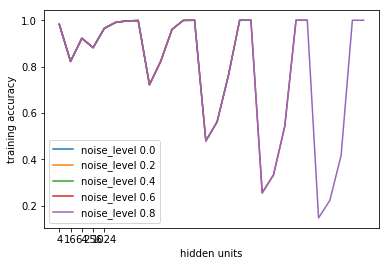

In [18]:
layers = [[4,4],[16,16],[64,64],[256,256],[1024, 1024]]
noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8]
#noise_levels = [0.0, 0.2]


for n_level in noise_levels:
    x_data = Add_noise(n_level, X_train)
    val_acc = []
    for layer in layers:
        model = build_network(params['activation'], layer, params['input_dim'], params['output_dim'])
        r = model.fit(x=x_data, y=Y_train, 
                      verbose = 2, 
                      batch_size = params['batch_size'],
                      epochs     = params['num_epochs'],
                      validation_data=(X_test[:1], Y_test[:1]),
                      shuffle=True)
        
        acc.append(r.history['acc'][-1])   
    plt.plot(acc, label = 'noise_level '+ str(n_level))
    
plt.legend()
plt.xlabel('hidden units')
plt.ylabel('training accuracy')
plt.xticks(np.arange(len(layers)), ['4','16','64','256','1024'])
plt.savefig('effect_of_noise.png')
plt.show()

## Time of Convergence with hidden size

In [11]:
layers = [[256,256],[1024, 1024], [4096, 4096]]
noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8]
#noise_levels = [0.8]
Overall_time = []
for n_level in noise_levels:
    x_data = Add_noise(n_level, X_train)
    time_conv = []
    for layer in layers:
        model = build_network(params['activation'], layer , params['input_dim'], params['output_dim'])
        start = time.time()
#        earlystop = EarlyStopping(monitor='acc', min_delta=0.001, patience=5, 
#                          verbose=1, mode='auto')
#        callbacks_list = [earlystop]
        acc = [0]
        iteration = 0
        print("n_level: ", n_level, ", num_neurons: ", layer)
        while acc[0] < 0.99:
            r = model.fit(x=x_data, y=Y_train, 
                      verbose = 2, 
                      batch_size = params['batch_size'],
                      epochs     = 1,
                      validation_data=(X_test[:1], Y_test[:1]),
#                      callbacks = callbacks_list,
                      shuffle=True)
            #print(r.history['acc'])
            acc = r.history['acc']
            iteration += 1
            print(iteration)
        end = time.time()
        time_conv.append(end - start)
    Overall_time.append(time_conv)
    time_conv = [z/float(max(time_conv)) for z in time_conv]
    plt.plot(time_conv,  label = 'noise_level '+ str(n_level))
    
plt.xlabel('Hidden Units')
plt.ylabel('Time to convergence')
plt.xticks(np.arange(3), ['256','1024','4096'])
plt.legend()
np.save('Overall_time.npy', Overall_time)
plt.savefig('time_to_conv.png')
plt.show()

Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 2s - loss: 0.8516 - acc: 0.7914 - val_loss: 0.0303 - val_acc: 1.0000
1
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 2s - loss: 0.3924 - acc: 0.8923 - val_loss: 0.0096 - val_acc: 1.0000
2
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 2s - loss: 0.3288 - acc: 0.9070 - val_loss: 0.0068 - val_acc: 1.0000
3
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 2s - loss: 0.2950 - acc: 0.9170 - val_loss: 0.0039 - val_acc: 1.0000
4
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 3s - loss: 0.2712 - acc: 0.9238 - val_loss: 0.0030 - val_acc: 1.0000
5
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 3s - loss: 0.2523 - acc: 0.9289 - val_loss: 0.0038 - val_acc: 1.0000
6
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 3s - loss: 0.2364 - acc: 0.9330 - val_loss: 0.0044 - val_acc: 1.0000
7
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 3s - loss: 0.2225 - acc: 0.9377

63
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 13s - loss: 0.7469 - acc: 0.8290 - val_loss: 0.0109 - val_acc: 1.0000
1
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 13s - loss: 0.3612 - acc: 0.9018 - val_loss: 0.0041 - val_acc: 1.0000
2
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 13s - loss: 0.3063 - acc: 0.9139 - val_loss: 0.0031 - val_acc: 1.0000
3
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 13s - loss: 0.2758 - acc: 0.9225 - val_loss: 0.0026 - val_acc: 1.0000
4
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 13s - loss: 0.2535 - acc: 0.9283 - val_loss: 0.0026 - val_acc: 1.0000
5
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 14s - loss: 0.2353 - acc: 0.9338 - val_loss: 0.0032 - val_acc: 1.0000
6
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 14s - loss: 0.2196 - acc: 0.9382 - val_loss: 0.0042 - val_acc: 1.0000
7
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 15s - loss: 0.2057 - 

12
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 166s - loss: 0.1433 - acc: 0.9606 - val_loss: 0.0045 - val_acc: 1.0000
13
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 179s - loss: 0.1360 - acc: 0.9626 - val_loss: 0.0042 - val_acc: 1.0000
14
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 164s - loss: 0.1289 - acc: 0.9649 - val_loss: 0.0038 - val_acc: 1.0000
15
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 157s - loss: 0.1225 - acc: 0.9673 - val_loss: 0.0041 - val_acc: 1.0000
16
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 157s - loss: 0.1166 - acc: 0.9689 - val_loss: 0.0047 - val_acc: 1.0000
17
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 156s - loss: 0.1111 - acc: 0.9701 - val_loss: 0.0049 - val_acc: 1.0000
18
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 156s - loss: 0.1062 - acc: 0.9713 - val_loss: 0.0039 - val_acc: 1.0000
19
Train on 60000 samples, validate on 1 samples
Epoch 1/1
 - 156s - 

KeyboardInterrupt: 

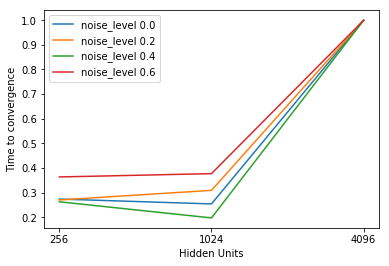

In [6]:
for i in range(4):
    plt.plot(Overall_time[i], label = 'noise_level '+str(noise_levels[i]))
plt.xlabel('Hidden Units')
plt.ylabel('Time to convergence')
plt.xticks(np.arange(3), ['256','1024','4096'])
plt.legend()
np.save('Overall_time.npy', Overall_time)
plt.savefig('time_to_conv.png')
plt.show()

## Time of Convergence with dataset Size

Train on 100 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 2.3482 - acc: 0.0700 - val_loss: 5.9529 - val_acc: 0.1034
Epoch 2/100
 - 0s - loss: 4.0452 - acc: 0.1600 - val_loss: 3.4348 - val_acc: 0.4379
Epoch 3/100
 - 0s - loss: 2.4446 - acc: 0.5700 - val_loss: 2.5062 - val_acc: 0.5582
Epoch 4/100
 - 0s - loss: 1.8579 - acc: 0.7300 - val_loss: 2.0308 - val_acc: 0.5868
Epoch 5/100
 - 0s - loss: 1.3507 - acc: 0.7900 - val_loss: 1.7404 - val_acc: 0.5756
Epoch 6/100
 - 0s - loss: 0.9666 - acc: 0.7900 - val_loss: 1.3394 - val_acc: 0.6076
Epoch 7/100
 - 0s - loss: 0.4918 - acc: 0.8500 - val_loss: 1.0149 - val_acc: 0.6972
Epoch 8/100
 - 0s - loss: 0.1786 - acc: 0.9900 - val_loss: 0.9266 - val_acc: 0.7176
Epoch 9/100
 - 0s - loss: 0.0849 - acc: 1.0000 - val_loss: 1.0361 - val_acc: 0.6715
Epoch 10/100
 - 0s - loss: 0.0847 - acc: 0.9800 - val_loss: 1.1987 - val_acc: 0.6406
Epoch 11/100
 - 0s - loss: 0.0984 - acc: 0.9800 - val_loss: 1.2480 - val_acc: 0.6362
Epoch 12/100
 - 0s - loss:

Epoch 3/100
 - 0s - loss: 0.2626 - acc: 0.9334 - val_loss: 0.4362 - val_acc: 0.8714
Epoch 4/100
 - 0s - loss: 0.1097 - acc: 0.9693 - val_loss: 0.5100 - val_acc: 0.8555
Epoch 5/100
 - 0s - loss: 0.0578 - acc: 0.9846 - val_loss: 0.4578 - val_acc: 0.8743
Epoch 6/100
 - 0s - loss: 0.0273 - acc: 0.9923 - val_loss: 0.4597 - val_acc: 0.8763
Epoch 7/100
 - 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.5137 - val_acc: 0.8676
Epoch 8/100
 - 0s - loss: 0.0118 - acc: 0.9974 - val_loss: 0.4344 - val_acc: 0.8915
Epoch 9/100
 - 0s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4463 - val_acc: 0.8907
Epoch 10/100
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4224 - val_acc: 0.8912
Epoch 11/100
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4513 - val_acc: 0.8869
Epoch 12/100
 - 0s - loss: 8.7355e-04 - acc: 1.0000 - val_loss: 0.4291 - val_acc: 0.8955
Epoch 00012: early stopping
Train on 3125 samples, validate on 10000 samples
Epoch 1/100
 - 1s - loss: 1.2872 - acc: 0.6234 - val_loss: 0.3670 - val_acc:

Epoch 2/100
 - 2s - loss: 0.7406 - acc: 0.7657 - val_loss: 0.2372 - val_acc: 0.9307
Epoch 3/100
 - 2s - loss: 0.1958 - acc: 0.9502 - val_loss: 0.2825 - val_acc: 0.9374
Epoch 4/100
 - 2s - loss: 0.0901 - acc: 0.9779 - val_loss: 0.3082 - val_acc: 0.9415
Epoch 5/100
 - 2s - loss: 0.0688 - acc: 0.9831 - val_loss: 0.2657 - val_acc: 0.9466
Epoch 6/100
 - 2s - loss: 0.0449 - acc: 0.9881 - val_loss: 0.3067 - val_acc: 0.9399
Epoch 7/100
 - 2s - loss: 0.0372 - acc: 0.9894 - val_loss: 0.2675 - val_acc: 0.9486
Epoch 8/100
 - 2s - loss: 0.0307 - acc: 0.9922 - val_loss: 0.2658 - val_acc: 0.9495
Epoch 9/100
 - 2s - loss: 0.0263 - acc: 0.9930 - val_loss: 0.3003 - val_acc: 0.9496
Epoch 10/100
 - 2s - loss: 0.0262 - acc: 0.9930 - val_loss: 0.3474 - val_acc: 0.9488
Epoch 11/100
 - 2s - loss: 0.0332 - acc: 0.9922 - val_loss: 0.3454 - val_acc: 0.9500
Epoch 12/100
 - 2s - loss: 0.0640 - acc: 0.9856 - val_loss: 0.4011 - val_acc: 0.9435
Epoch 13/100
 - 2s - loss: 0.1569 - acc: 0.9526 - val_loss: 0.3839 - val_

Epoch 3/100
 - 7s - loss: 1.2158 - acc: 0.5733 - val_loss: 0.1295 - val_acc: 0.9647
Epoch 4/100
 - 7s - loss: 0.7896 - acc: 0.7342 - val_loss: 0.1646 - val_acc: 0.9618
Epoch 5/100
 - 7s - loss: 0.4366 - acc: 0.8584 - val_loss: 0.2233 - val_acc: 0.9595
Epoch 6/100
 - 7s - loss: 0.2632 - acc: 0.9164 - val_loss: 0.2563 - val_acc: 0.9579
Epoch 7/100
 - 7s - loss: 0.1987 - acc: 0.9401 - val_loss: 0.2750 - val_acc: 0.9591
Epoch 8/100
 - 7s - loss: 0.1627 - acc: 0.9530 - val_loss: 0.2971 - val_acc: 0.9576
Epoch 9/100
 - 7s - loss: 0.1377 - acc: 0.9597 - val_loss: 0.2620 - val_acc: 0.9651
Epoch 10/100
 - 7s - loss: 0.1163 - acc: 0.9643 - val_loss: 0.2441 - val_acc: 0.9675
Epoch 11/100
 - 7s - loss: 0.1110 - acc: 0.9666 - val_loss: 0.2989 - val_acc: 0.9650
Epoch 12/100
 - 7s - loss: 0.1137 - acc: 0.9669 - val_loss: 0.2564 - val_acc: 0.9684
Epoch 13/100
 - 7s - loss: 0.0957 - acc: 0.9725 - val_loss: 0.2941 - val_acc: 0.9647
Epoch 14/100
 - 7s - loss: 0.0944 - acc: 0.9751 - val_loss: 0.2951 - val

Epoch 18/100
 - 7s - loss: 0.1210 - acc: 0.9639 - val_loss: 0.4755 - val_acc: 0.9511
Epoch 19/100
 - 7s - loss: 0.1212 - acc: 0.9637 - val_loss: 0.4744 - val_acc: 0.9541
Epoch 20/100
 - 7s - loss: 0.1180 - acc: 0.9640 - val_loss: 0.4494 - val_acc: 0.9547
Epoch 21/100
 - 7s - loss: 0.1003 - acc: 0.9693 - val_loss: 0.4661 - val_acc: 0.9534
Epoch 22/100
 - 7s - loss: 0.1042 - acc: 0.9685 - val_loss: 0.4555 - val_acc: 0.9538
Epoch 23/100
 - 7s - loss: 0.1063 - acc: 0.9691 - val_loss: 0.5846 - val_acc: 0.9443
Epoch 24/100
 - 7s - loss: 0.1097 - acc: 0.9686 - val_loss: 0.4970 - val_acc: 0.9537
Epoch 25/100
 - 7s - loss: 0.1027 - acc: 0.9703 - val_loss: 0.4530 - val_acc: 0.9547
Epoch 26/100
 - 7s - loss: 0.0858 - acc: 0.9741 - val_loss: 0.5540 - val_acc: 0.9502
Epoch 27/100
 - 7s - loss: 0.0840 - acc: 0.9770 - val_loss: 0.4940 - val_acc: 0.9557
Epoch 28/100
 - 7s - loss: 0.1037 - acc: 0.9725 - val_loss: 0.5844 - val_acc: 0.9489
Epoch 29/100
 - 7s - loss: 0.0927 - acc: 0.9734 - val_loss: 0.583

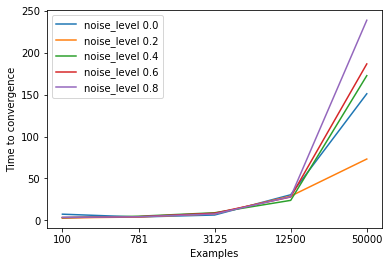

In [6]:
total_train = [100, 781, 3125, 12500, 50000]
noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8]
#noise_levels = [0.0, 0.2]
Overall_time_1 = []
for n_level in noise_levels:
    time_conv = []
    for num in total_train:
        ## Sample num samples
        ix = random.sample(range(0, len(X_train)), num)
        X_data = X_train[ix]
        Y_data = Y_train[ix]
        x_data = Add_noise(n_level, X_data)
        
        model = build_network(params['activation'], params['layers'], params['input_dim'], params['output_dim'])
        start = time.time()
        earlystop = EarlyStopping(monitor='acc', min_delta=0.001, patience=5, 
                          verbose=1, mode='auto')
        callbacks_list = [earlystop]
        r = model.fit(x=x_data, y=Y_data, 
                      verbose = 2, 
                      batch_size = params['batch_size'],
                      epochs     = 100,
                      validation_data=(X_test, Y_test),
                      callbacks = callbacks_list,
                      shuffle=True)
        end = time.time()
        time_conv.append(end - start)
    #time_conv = [z/float(max(time_conv)) for z in time_conv]
    Overall_time_1.append(time_conv)
    plt.plot(time_conv,  label = 'noise_level '+ str(n_level))

plt.xlabel('Examples')
plt.ylabel('Time to convergence')
plt.xticks(np.arange(5), [100, 781, 3125, 12500, 50000])
plt.legend()
plt.savefig('time_to_conv_samples.png')
plt.show()

In [7]:
Overall_time_1

[[7.245622158050537,
  3.880950927734375,
  6.2473390102386475,
  30.458383083343506,
  151.15747380256653],
 [2.7828121185302734,
  3.851668119430542,
  7.653772830963135,
  28.84587812423706,
  73.17207312583923],
 [3.0980899333953857,
  4.805349111557007,
  8.943825960159302,
  23.765146017074585,
  172.80469179153442],
 [3.1133620738983154,
  4.246937036514282,
  8.43122410774231,
  27.780154943466187,
  186.81553506851196],
 [3.510531187057495,
  4.10051703453064,
  7.504204988479614,
  28.098464012145996,
  239.03502082824707]]